## Libraries

In [2]:
pip install missingno

In [3]:
# necessary imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [4]:
df = pd.read_csv("Concrete Compressive Strength.csv")

In [5]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age (day)  Concrete compressive strength   
0            1040.0           676.0         28                       79.986111  
1            1055.0           676.0         28                       61.887366  
2             932.0           594.0        270                       40.269535  
3             932.0           594.0        365                       41.052780  
4             978.4           825.5        360                       44.296075

## Data Cleaning and Preprocessing

In [6]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregate  Fine Aggregate    Age (day)  \
count       1030.000000       1030.000000     1030.000000  1030.000000   
mean           6.203112        972.918592      773.578883    45.662136   
std            5.973492         77.753818       80.175427    63.169912   
min            0.000000        801.000000      594.000000     1.000000   
25%            0.000000        932.000000      730.950000     7.000000   
50%            6.350000        968.000000      779.510000    28.000000   
75%           10.160000       1029.400000      824.000000    56.000000   
max           32.200000       1145.000000      992.600000   365.000000   

       Concrete compressive strength   
count                     1030.000000  
mean                        35.817836  
std                         16.705679  
min                          2.331808  
25%                         23.707115  
50%                         34.442774  
75%                         46.136287  
max                         82.599225

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


##### Checking for Missing Values

In [8]:
df.isna().sum()

Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64

###### no missing values present in dataset

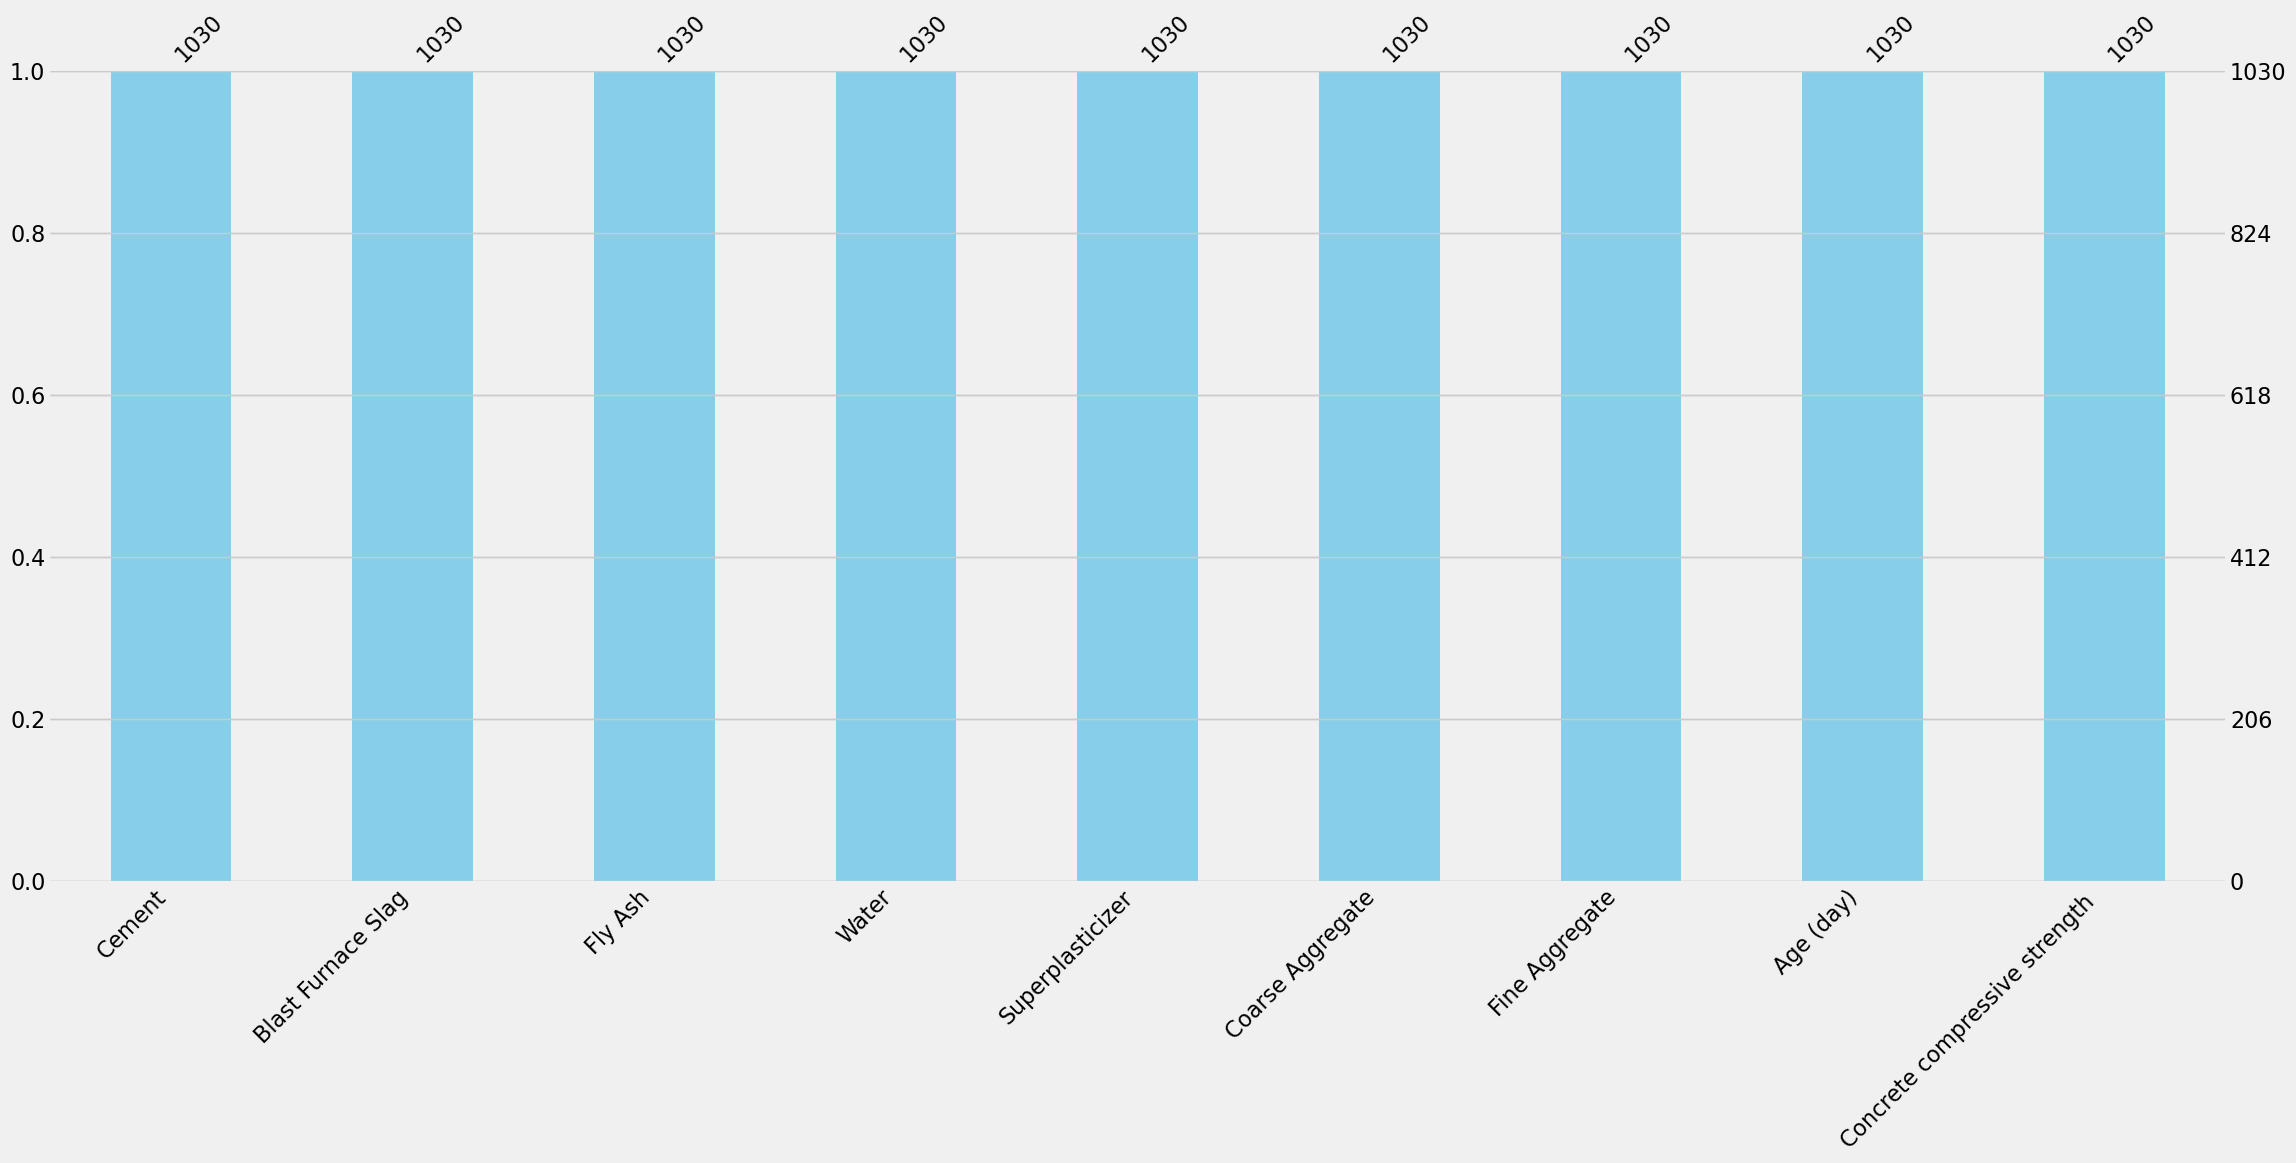

In [10]:
# visualizing missing values

msno.bar(df, color = 'skyblue')
plt.show()

##### Outliers Detection

In [11]:
df.head()

Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age (day)  Concrete compressive strength   
0            1040.0           676.0         28                       79.986111  
1            1055.0           676.0         28                       61.887366  
2             932.0           594.0        270                       40.269535  
3             932.0           594.0        365                       41.052780  
4             978.4           825.5        360                       44.296075

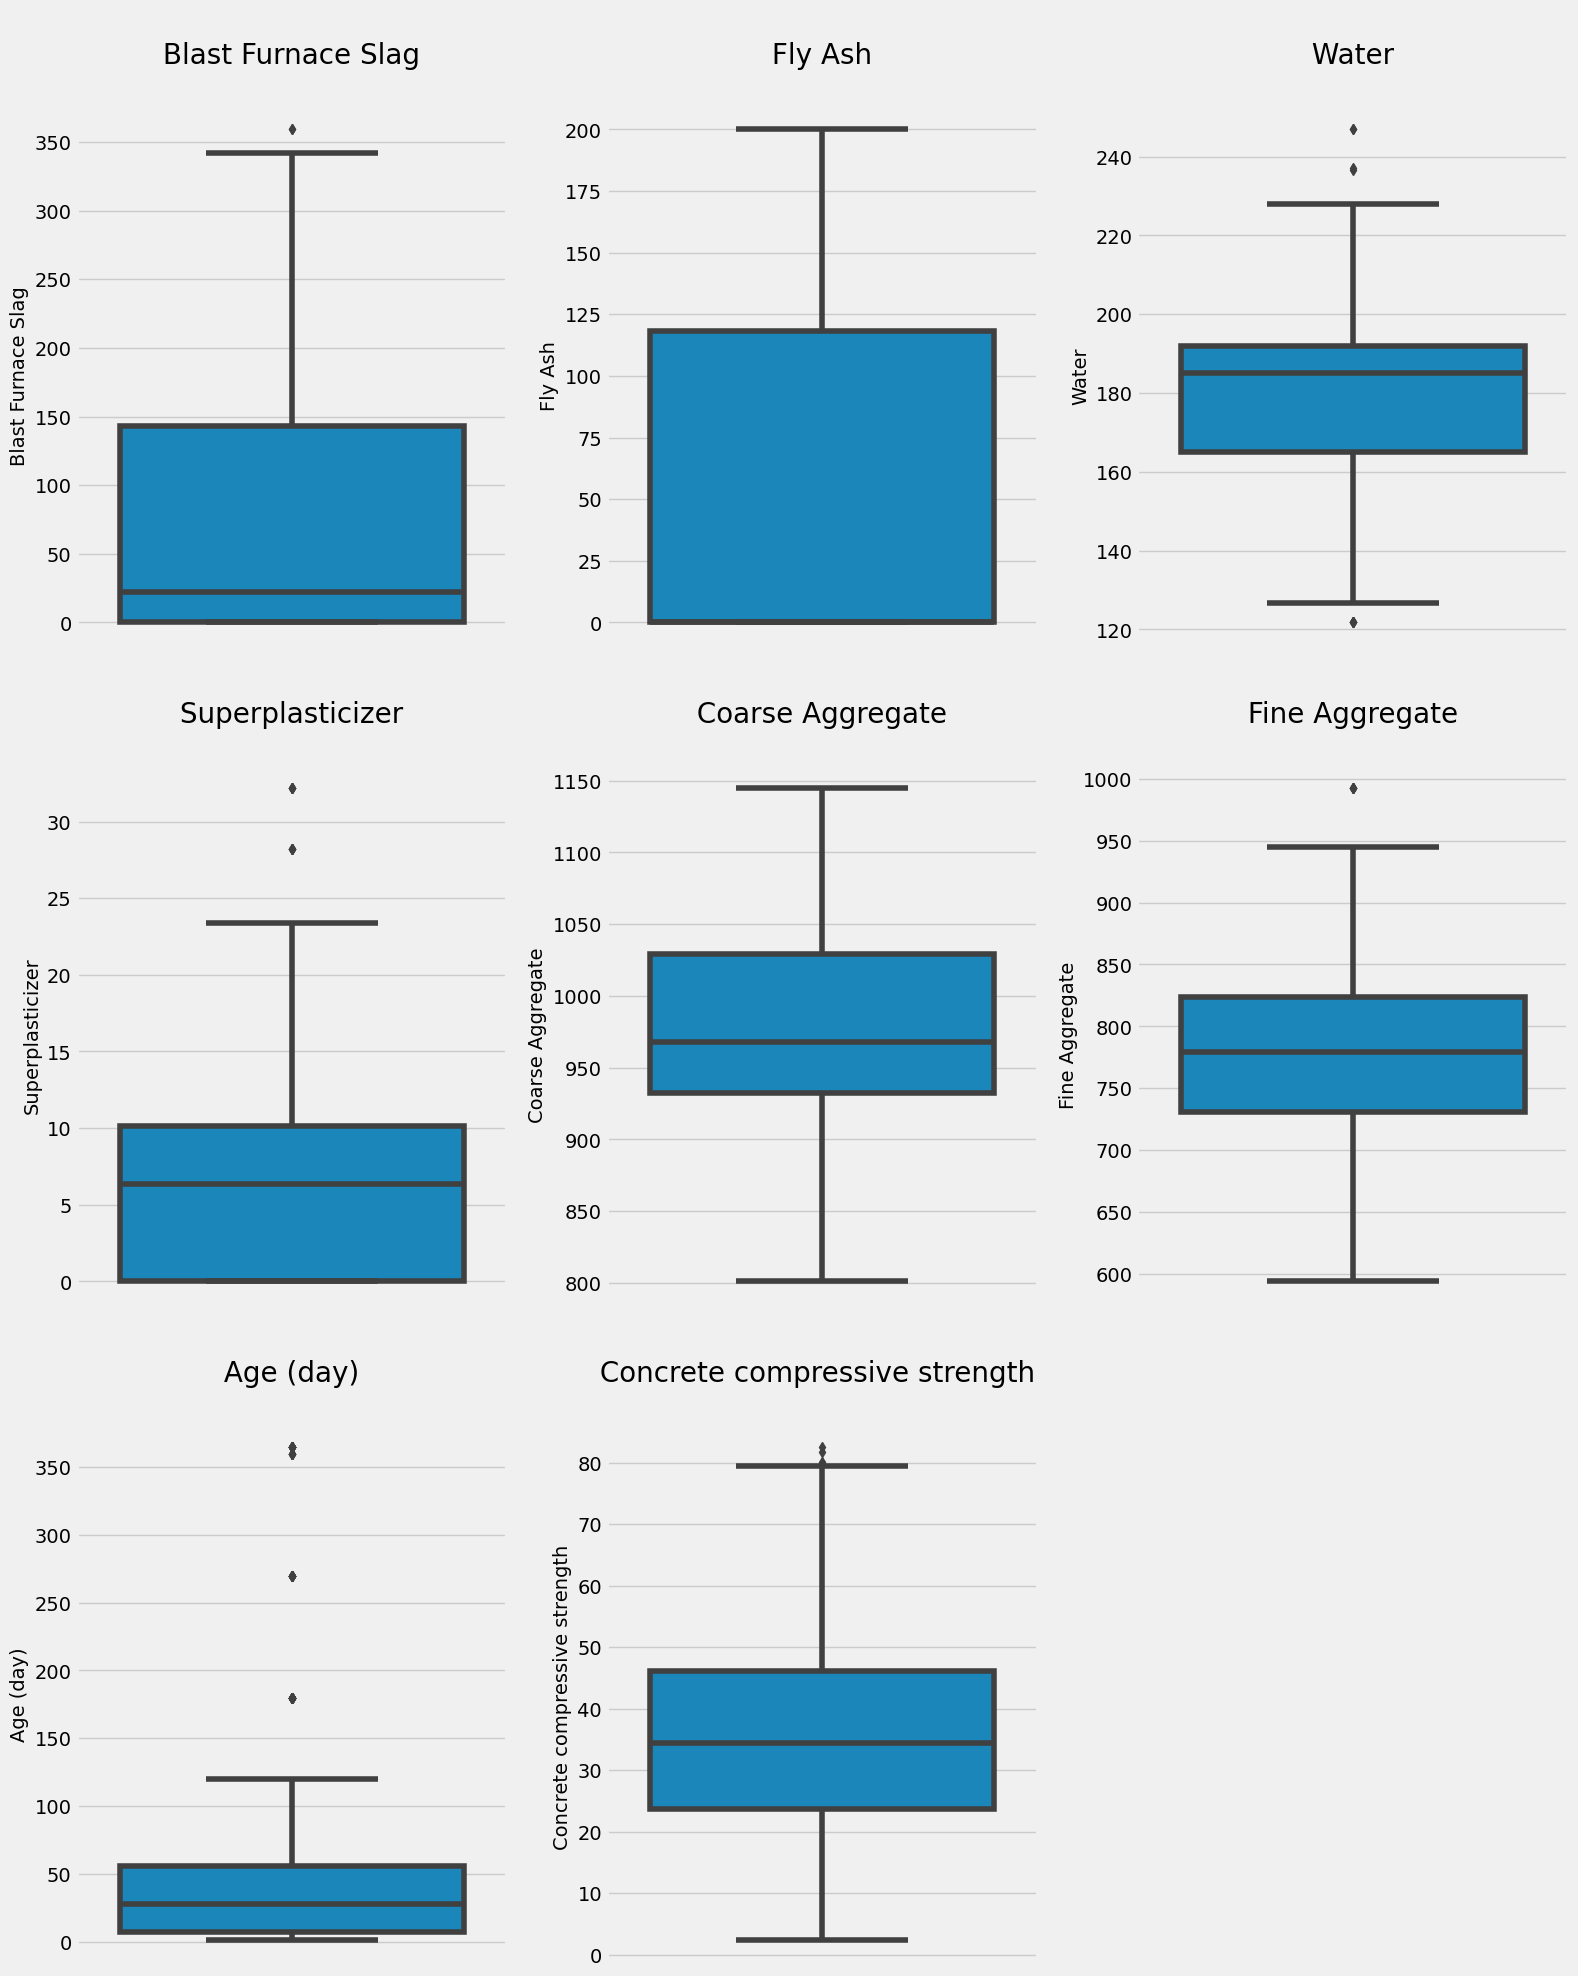

In [12]:
cols = df.columns

plt.figure(figsize = (16,20))
plotnumber = 1

for i in range(1, len(cols)):
    if plotnumber <=9:
        ax = plt.subplot(3,3, plotnumber)
        sns.boxplot(y = cols[i], data = df, ax = ax)
        plt.title(f"\n {cols[i]} \n", fontsize = 20)
        
    plotnumber +=1
    
plt.tight_layout()
plt.show()

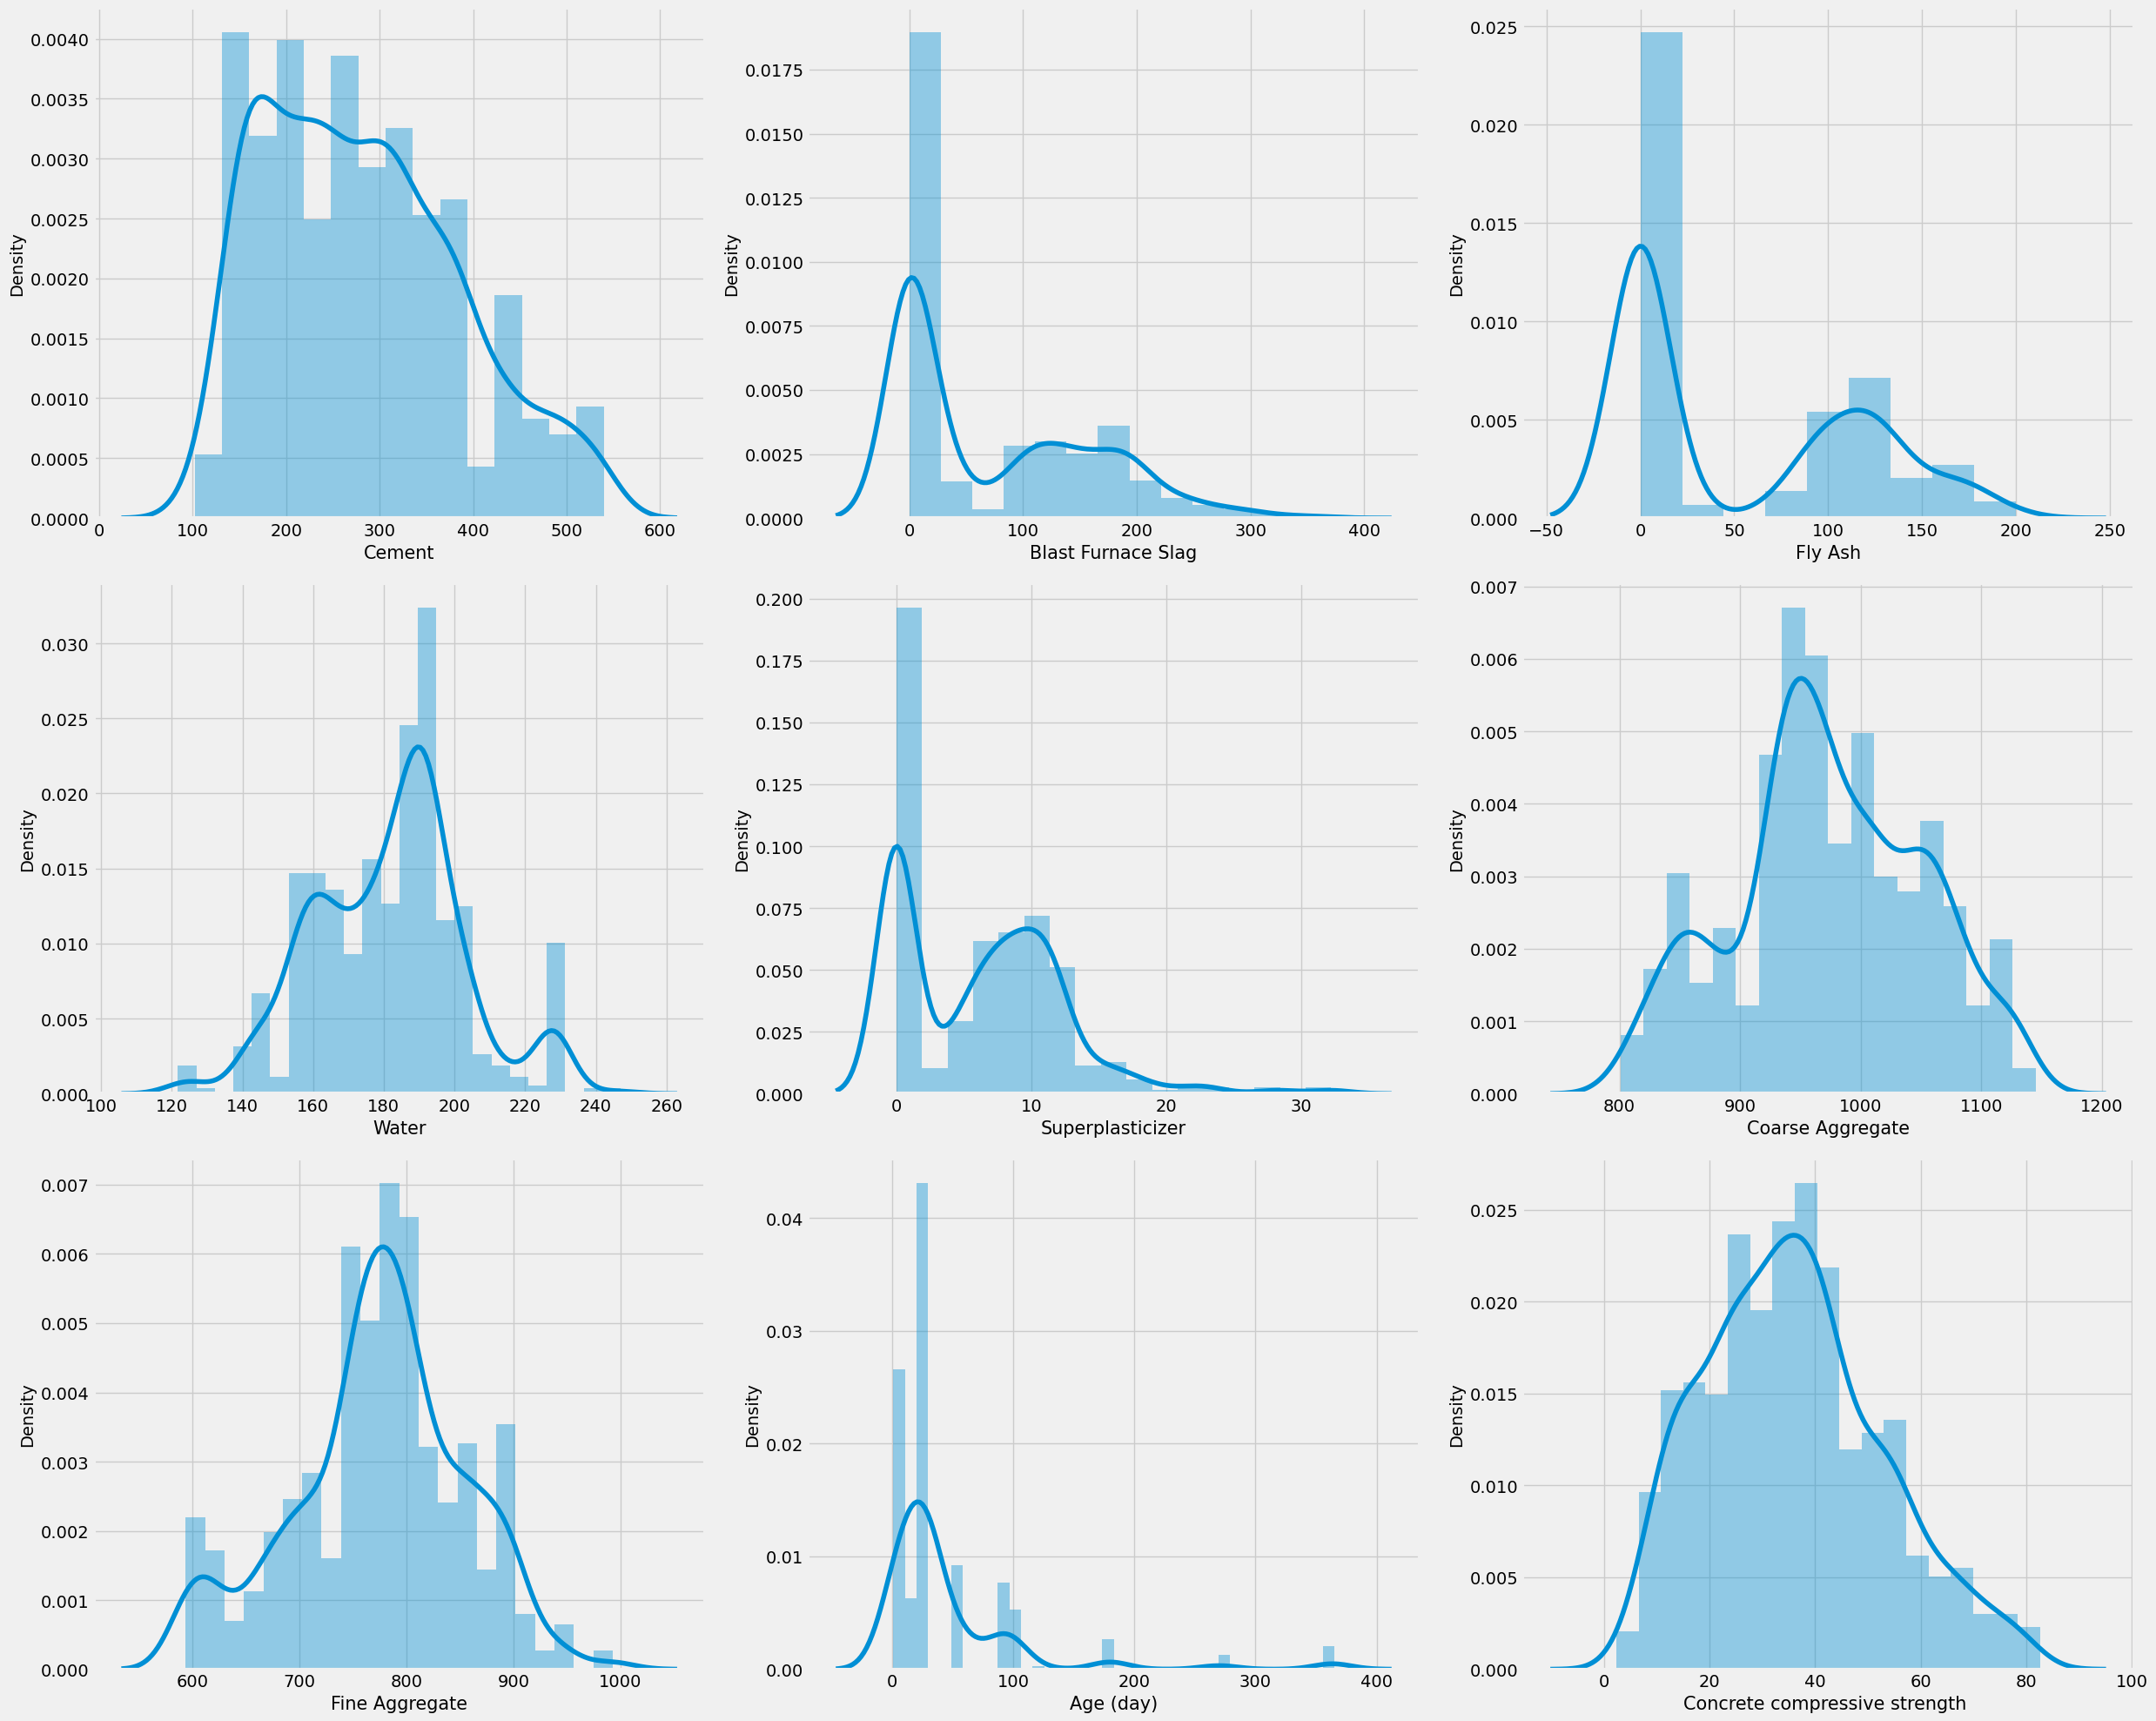

In [13]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in df.columns:
    if plotnumber <= 9: 
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

###### outliers are present in water, Superplasticizer and Age columns, I will handle these outliers later in feature engineering part

## Exploratory Data Analysis (EDA)

##### Correlation Analysis

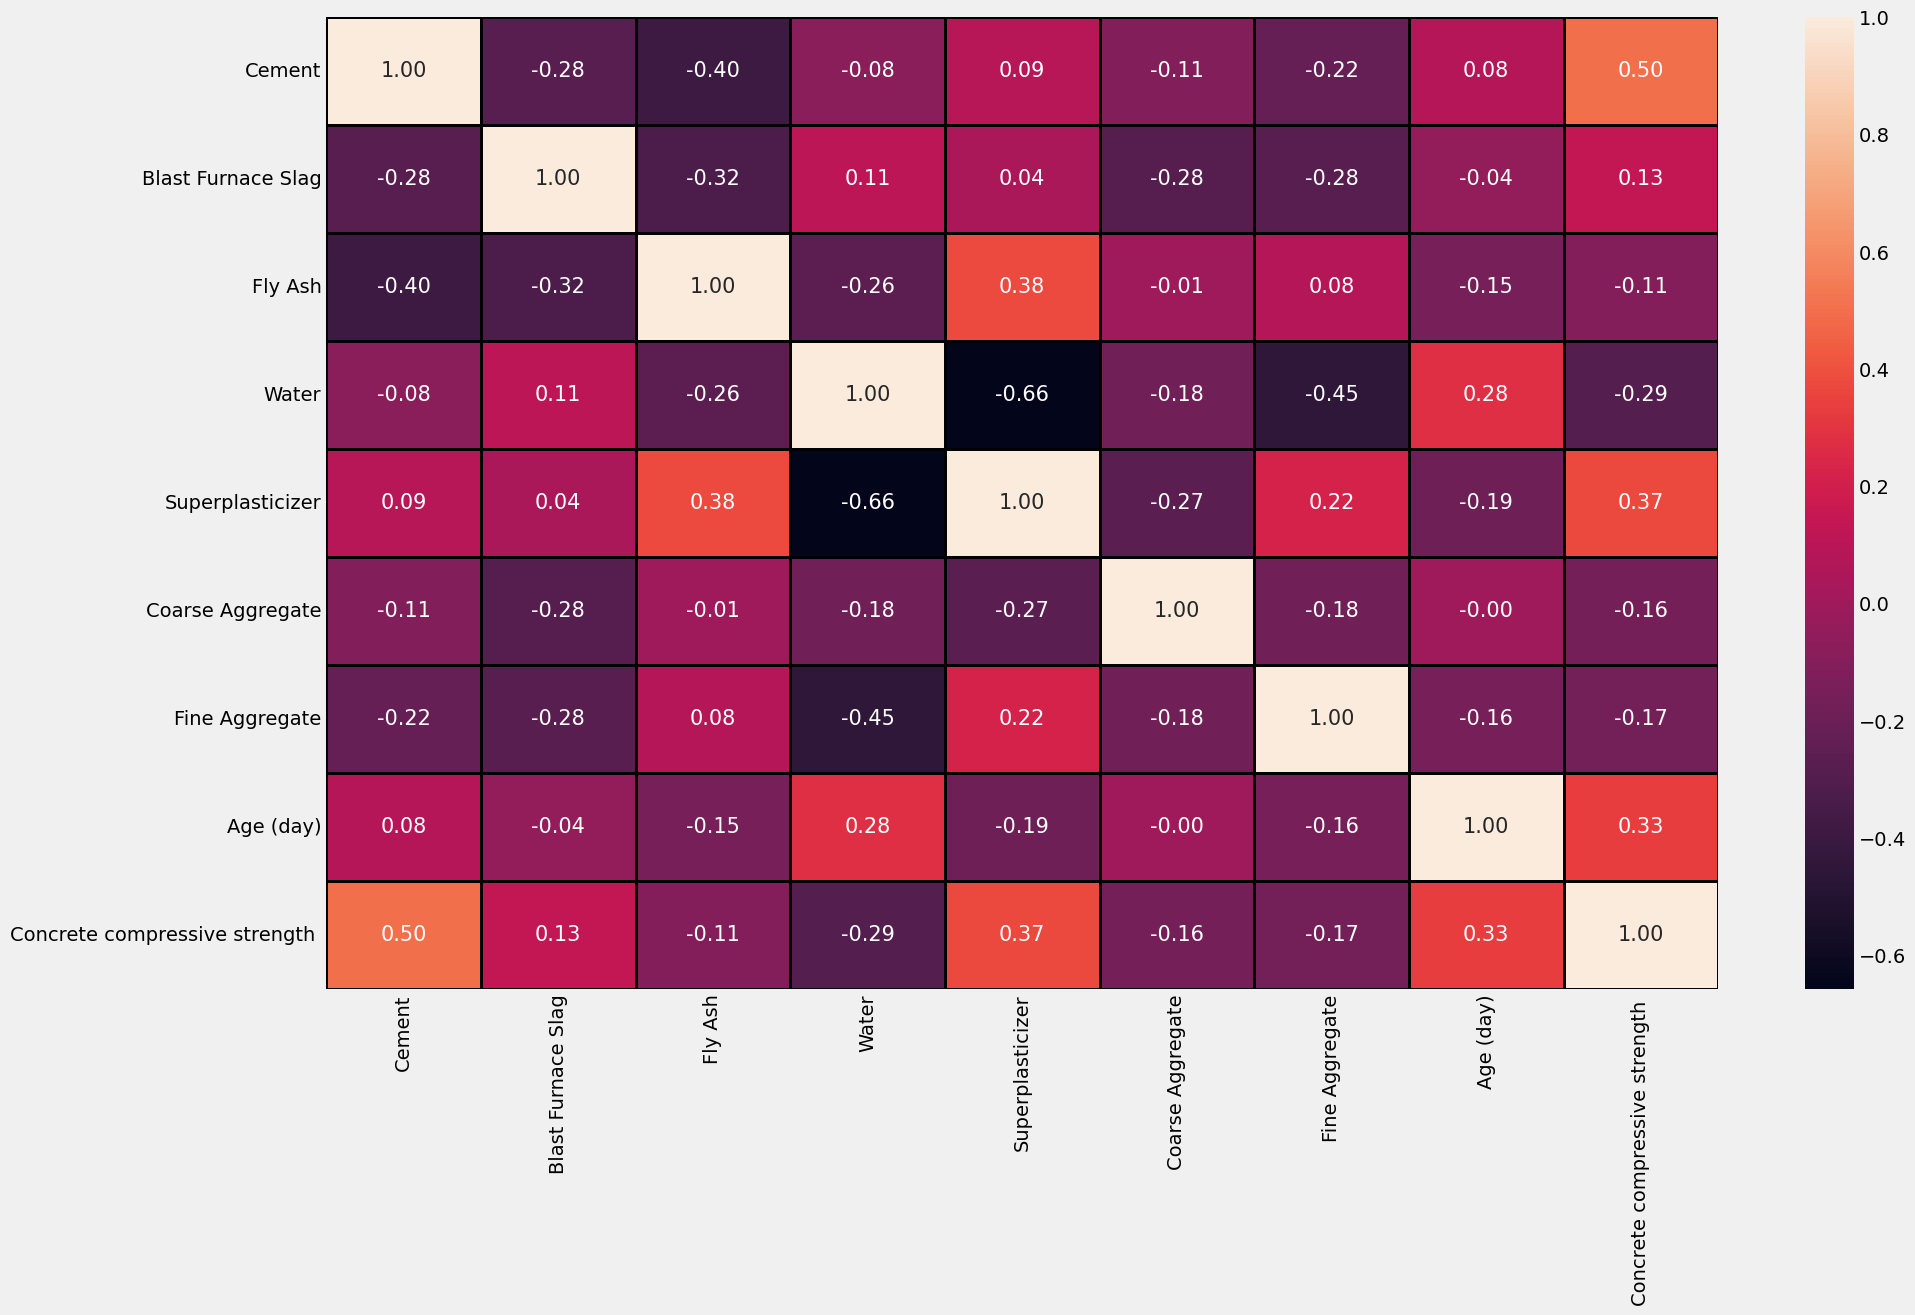

In [18]:
plt.figure(figsize = (20,12))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f', annot_kws = {'size' : 15}, linewidth = 2, linecolor = 'black')
plt.show()

##### Pair Plot

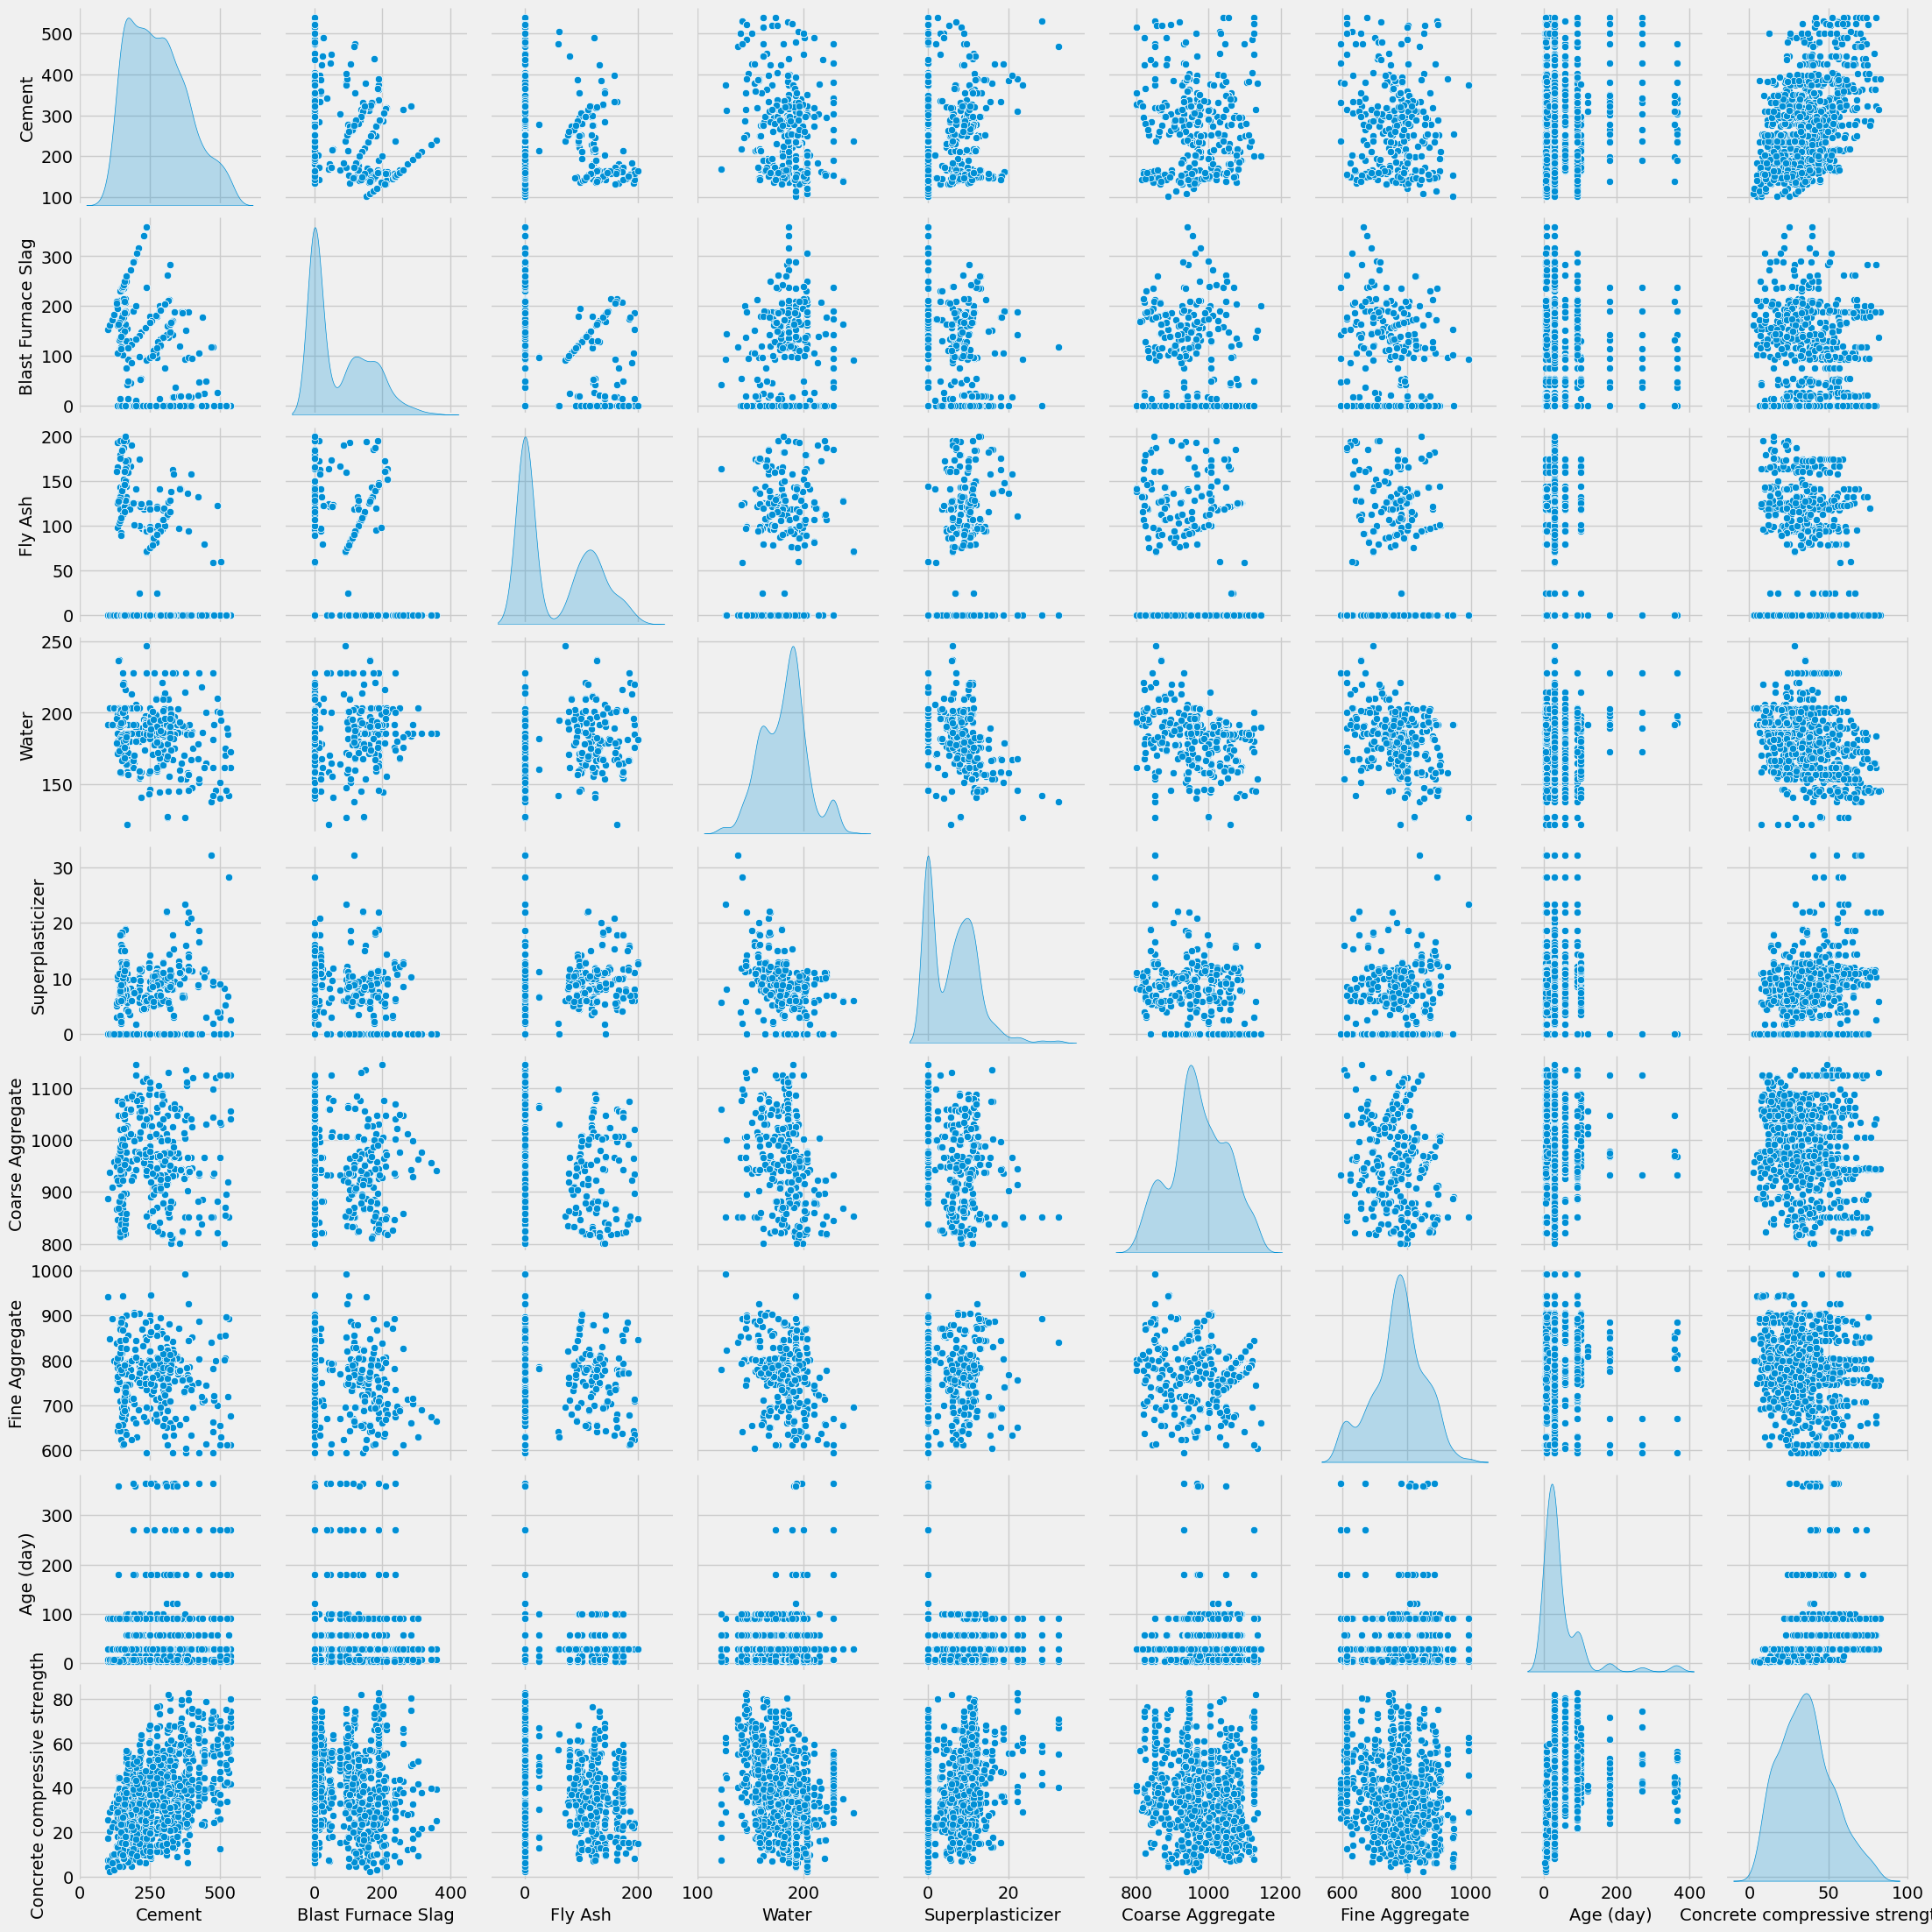

<Figure size 640x480 with 0 Axes>

In [19]:
sns.pairplot(df, diag_kind = 'kde')
plt.show()
plt.savefig('pairplot.png')

## Feature Engineering

##### Creating Features and Label

In [20]:
# creating feature and label

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [21]:
X.var()

Cement                10921.742654
Blast Furnace Slag     7444.083725
Fly Ash                4095.548093
Water                   456.060245
Superplasticizer         35.682602
Coarse Aggregate       6045.656228
Fine Aggregate         6428.099159
Age (day)              3990.437729
dtype: float64

##### Normalizing Features

In [22]:
# normalizing features
# let's add 1 to each value in everycolumn so that we don't get exception 
#while calculating the log value of 0

for column in X.columns:
    X[column] += 1
    X[column] = np.log(X[column])

In [23]:
X.var()

Cement                0.143939
Blast Furnace Slag    5.816392
Fly Ash               5.641045
Water                 0.014066
Superplasticizer      1.333888
Coarse Aggregate      0.006475
Fine Aggregate        0.011292
Age (day)             1.233057
dtype: float64

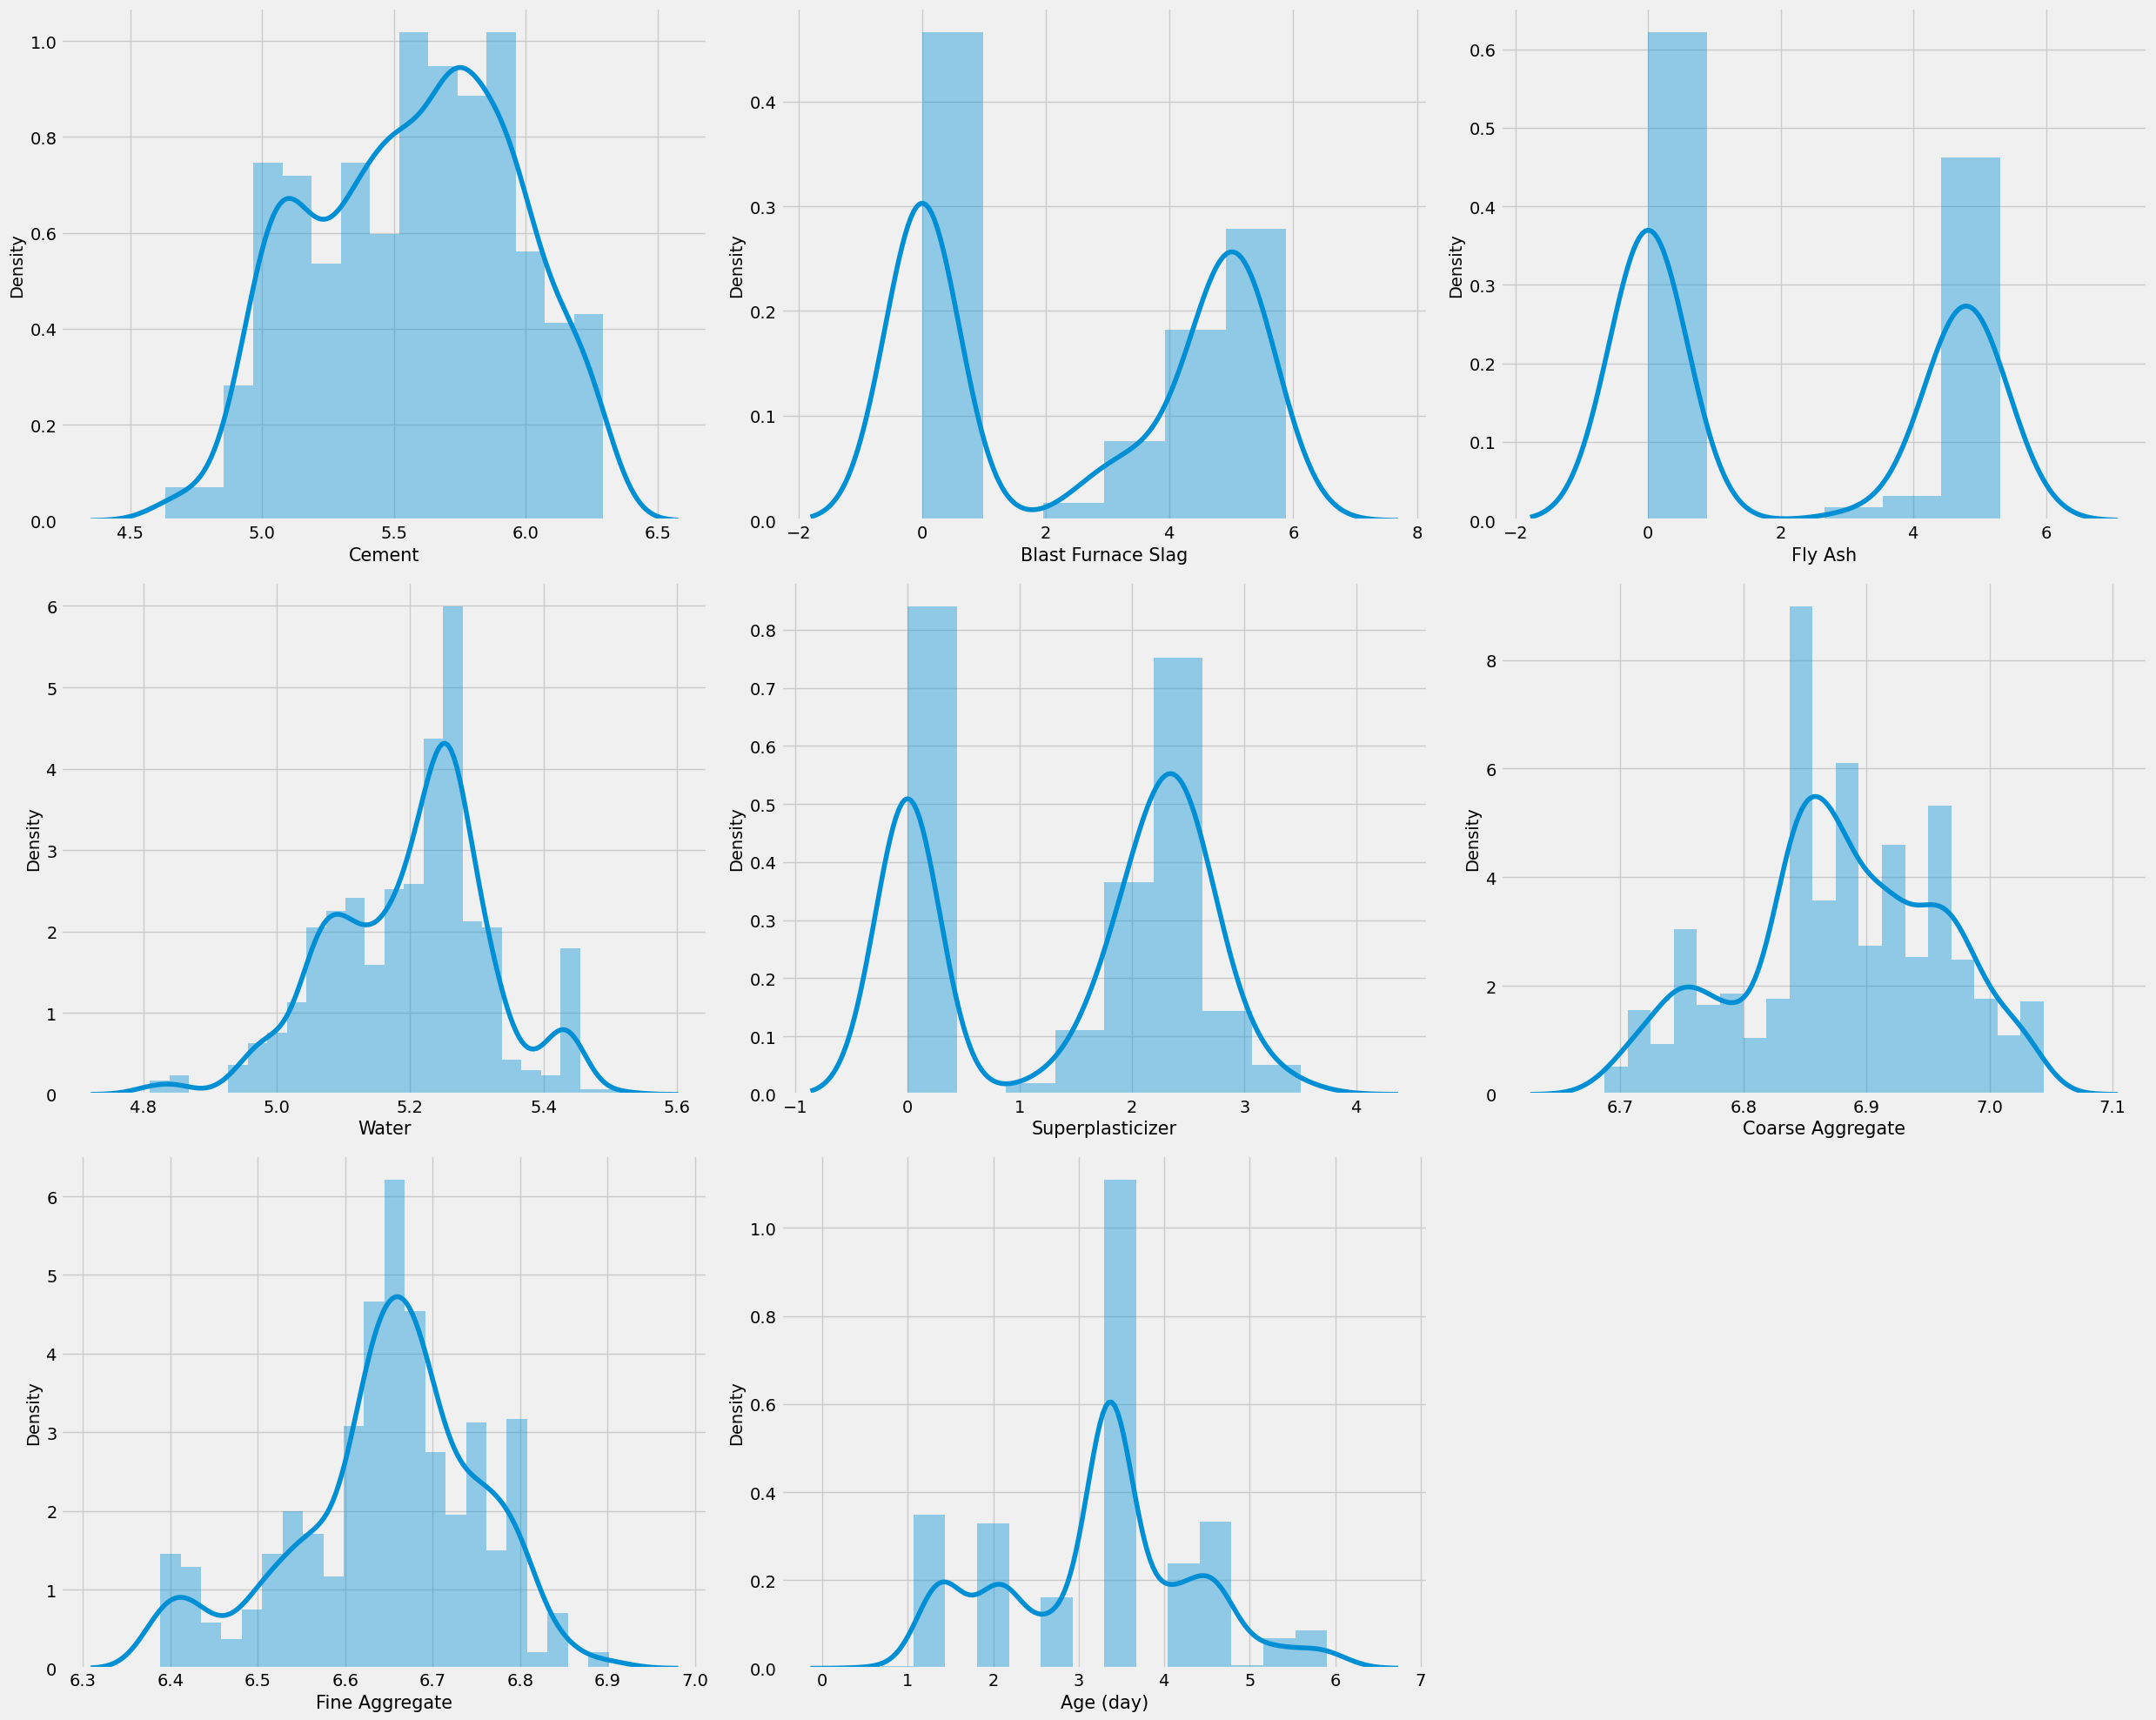

In [24]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(X[col])
        plt.xlabel(col, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

###### data is normalized, let's check for outliers.

##### Checking for outliers

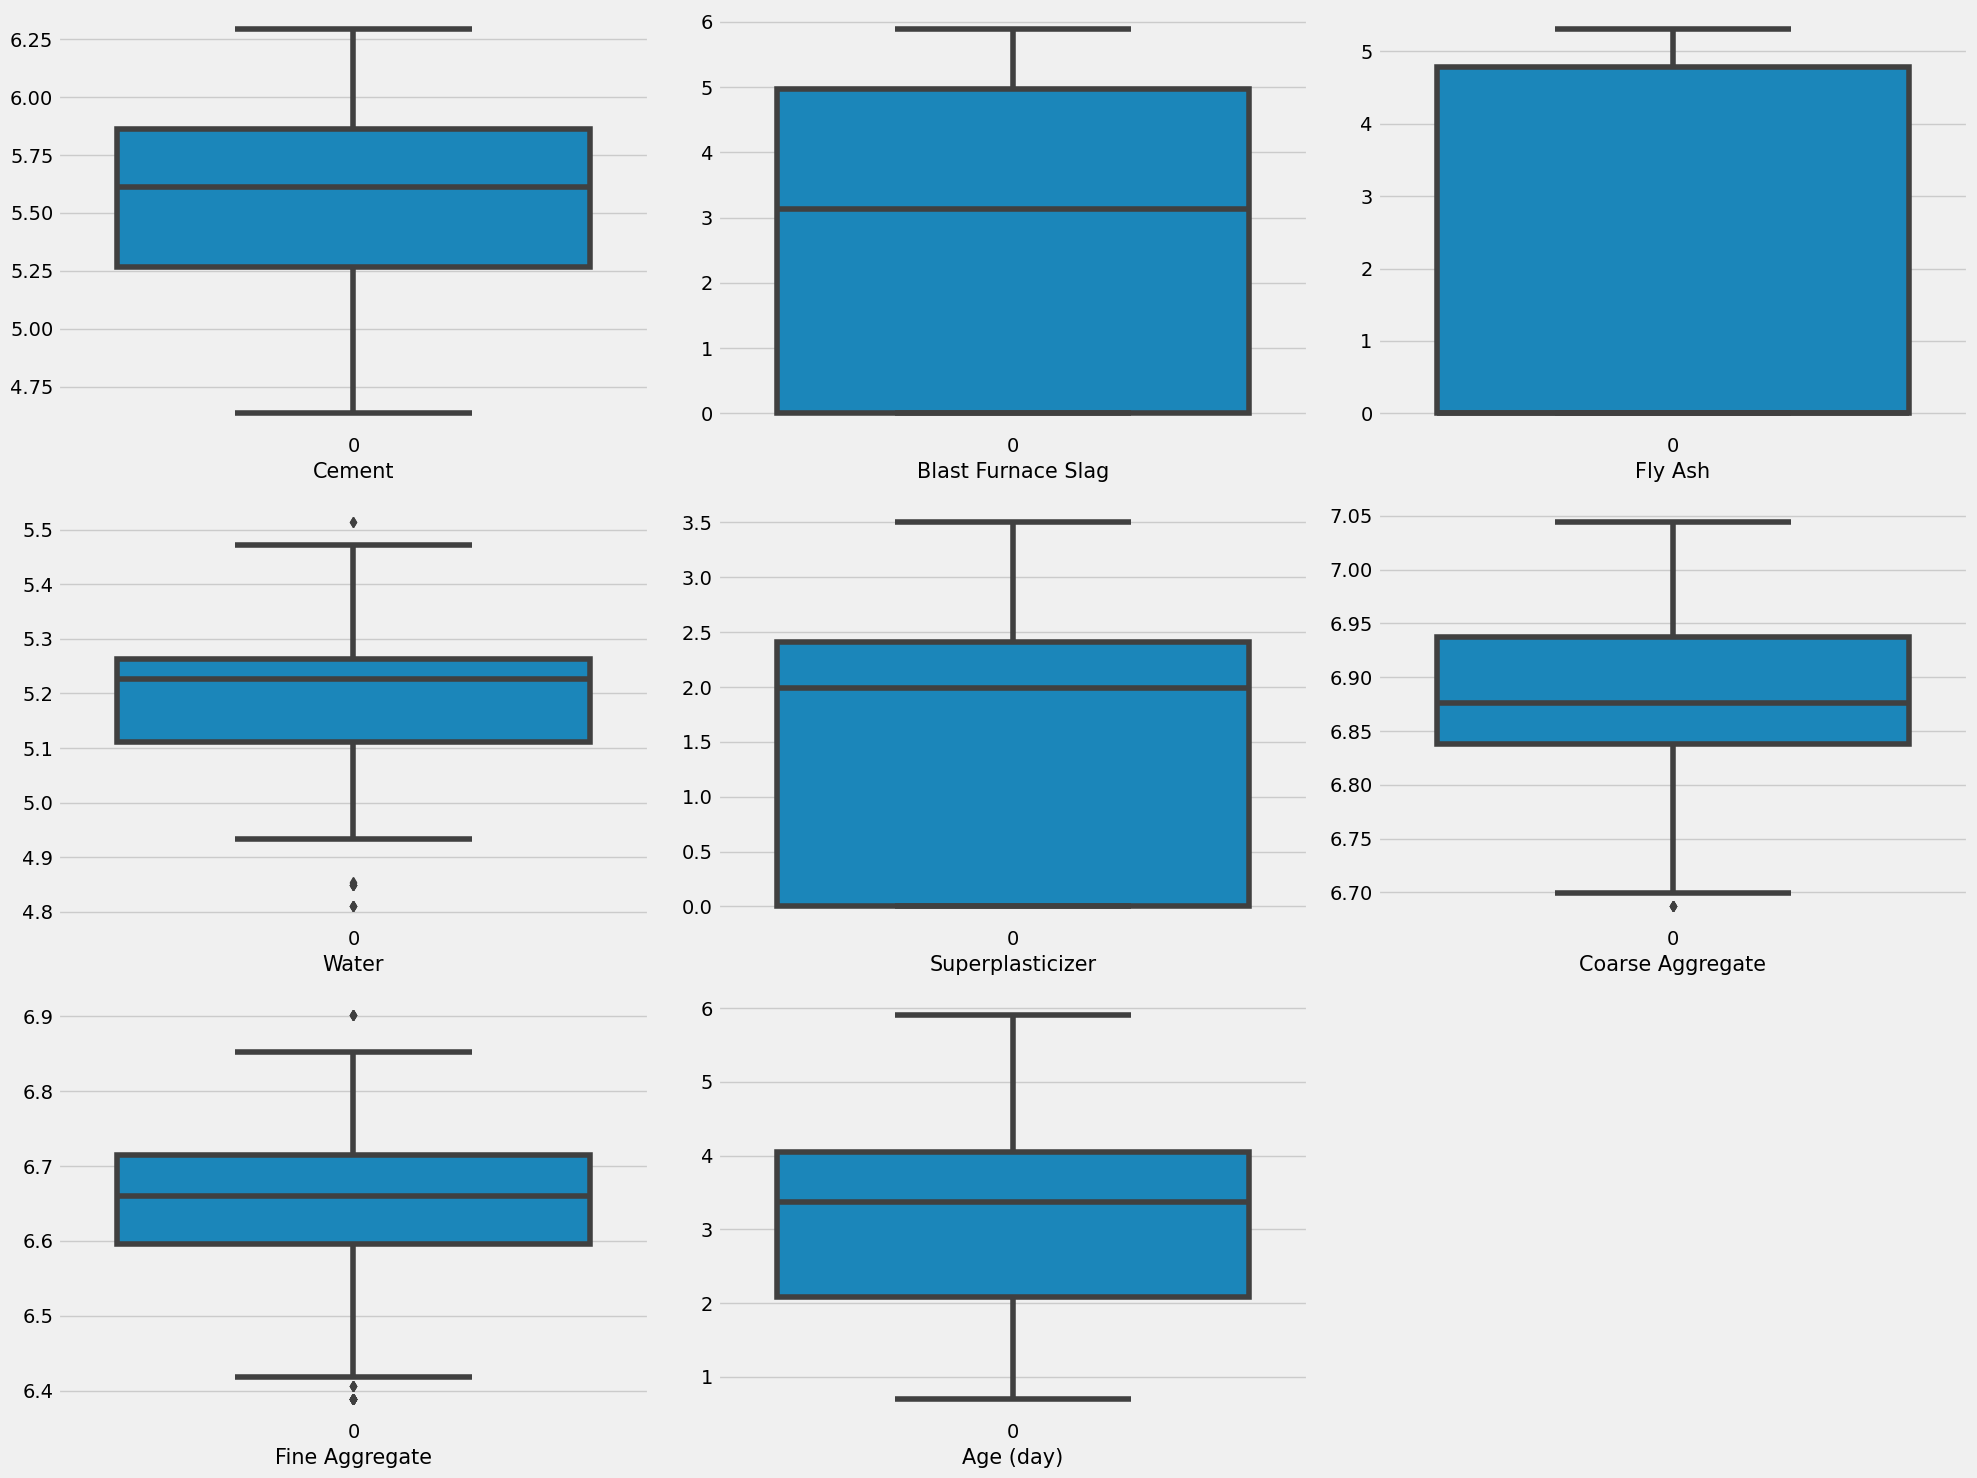

In [27]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for col in X.columns:
    if plotnumber <= 8:
        ax = plt.subplot(3, 3, plotnumber)
        sns.boxplot(X[col])
        plt.xlabel(col, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()

##### Splitting Dataset into Training and Test Set

In [28]:
# splitting data into training and test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [29]:
# scaling data

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

## Modelling

##### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [31]:
lr.score(X_train, y_train)

0.803882533841996

In [32]:
lr.score(X_test, y_test)

0.7956917166695399

##### Lasso Regression

In [33]:
from sklearn.linear_model import Lasso, LassoCV

In [35]:
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 10000)
lassocv.fit(X_train, y_train)

LassoCV(cv=10, max_iter=10000)

In [36]:
lasso = Lasso(alpha = lassocv.alpha_)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1738089224575609)

In [37]:
lasso.score(X_train, y_train)

0.802874888966856

In [38]:
lasso.score(X_test, y_test)

0.7957733346434258

##### Decision Tree Regressor

In [40]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)

DecisionTreeRegressor()

In [41]:
dtr.score(X_train, y_train)

0.9966688444975299

In [42]:
dtr.score(X_test, y_test)

0.8161619344096145

In [43]:
# Hyper Parameter Tuning Decision Tree Regressor

from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['mse', 'friedman_mse', 'mae'],
    'splitter' : ['best', 'random'],
    'max_depth' : [3, 5, 7, 9, 10],
    'min_samples_split' : [1, 2, 3, 4, 5],
    'min_samples_leaf' : [1, 2, 3, 4, 5]
}

grid_search = GridSearchCV(dtr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 750 candidates, totalling 3750 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [3, 5, 7, 9, 10],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             verbose=1)

In [44]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'friedman_mse', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 4, 'splitter': 'random'}
0.8187585901485551


In [45]:
dtr = DecisionTreeRegressor(criterion = 'friedman_mse', max_depth = 10, min_samples_leaf = 1, min_samples_split = 4, splitter = 'random')
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=10,
                      min_samples_split=4, splitter='random')

In [46]:
dtr.score(X_train, y_train)

0.9205148584539866

In [47]:
dtr.score(X_test, y_test)

0.8353736515092911

##### Random Forest Regression

In [48]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
rfr.score(X_train, y_train)

0.9853767063380086

In [50]:
rfr.score(X_test, y_test)

0.8944101209708922

##### Ada Boost Regression

In [52]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(estimator = dtr)
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                  max_depth=10,
                                                  min_samples_split=4,
                                                  splitter='random'))

In [53]:
ada.score(X_train, y_train)

0.9561279379960832

In [54]:
ada.score(X_test, y_test)

0.875513500362707

In [55]:
# hyper parameter tuning 

grid_params = {
    'n_estimators' : [40, 50, 80, 100],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1, 10],
    'loss' : ['linear','square', 'exponential']
}

grid_search = GridSearchCV(ada, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5,
             estimator=AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                                         max_depth=10,
                                                                         min_samples_split=4,
                                                                         splitter='random')),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1, 10],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [40, 50, 80, 100]},
             verbose=1)

In [56]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}
0.8972486049554208


In [57]:
ada = AdaBoostRegressor(estimator = dtr, learning_rate = 0.1, loss = 'exponential', n_estimators = 100)
ada.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                  max_depth=10,
                                                  min_samples_split=4,
                                                  splitter='random'),
                  learning_rate=0.1, loss='exponential', n_estimators=100)

In [58]:
ada.score(X_train, y_train)

0.9874198859285269

In [59]:
ada.score(X_test, y_test)

0.8849061803772271

##### Gradient Boost Regression

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [61]:
gbr.score(X_train, y_train)

0.9483793024267166

In [62]:
gbr.score(X_test, y_test)

0.9054832048120703

In [63]:
# hyper parameter tuning of gradient boost regressor

grid_params = {
    'n_estimators': [90, 100, 120, 180, 200],
    'learning_rate' : [0.01, 0.1, 0.05, 0.5, 1],
    'loss' : ['ls', 'lad', 'huber', 'quantile']
}

grid_search = GridSearchCV(gbr, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.05, 0.5, 1],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'n_estimators': [90, 100, 120, 180, 200]},
             verbose=1)

In [64]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'learning_rate': 0.1, 'loss': 'huber', 'n_estimators': 200}
0.909592702816032


In [66]:
gbr = GradientBoostingRegressor(learning_rate = 0.1, loss = 'huber', n_estimators = 200)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(loss='huber', n_estimators=200)

In [67]:
gbr.score(X_train, y_train)

0.9644271117428251

In [68]:
gbr.score(X_test, y_test)

0.9099761415194602

##### XGBoost Regression

In [69]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster = 'gbtree', learning_rate = 0.1, max_depth = 7, n_estimators = 200)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [70]:
xgb.score(X_train, y_train)

0.9960839442496526

In [71]:
xgb.score(X_test, y_test)

0.9152157536299493

##### Voting Regression

In [72]:
from sklearn.ensemble import VotingRegressor

regressors = [('Linear Regression', lr), ('Lasso Regression', lasso), ('Decision Tree', dtr), ('Random Forest', rfr), ('Ada Boost', ada), ('Gradient Boost', gbr),
              ('XgBoost', xgb)]

vr = VotingRegressor(estimators = regressors, n_jobs = -1, verbose = 1, weights = (0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))
vr.fit(X_train, y_train)

VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Lasso Regression',
                             Lasso(alpha=0.1738089224575609)),
                            ('Decision Tree',
                             DecisionTreeRegressor(criterion='friedman_mse',
                                                   max_depth=10,
                                                   min_samples_split=4,
                                                   splitter='random')),
                            ('Random Forest', RandomForestRegressor()),
                            ('Ada Boost',
                             AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='...
                                          interaction_constraints=None,
                                          learning_rate=0.1, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=7,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None, n_estimators=200,
                                          n_jobs=None, num_parallel_tree=None,
                                          random_state=None, ...))],
                n_jobs=-1, verbose=1,
                weights=(0.1, 0.1, 0.1, 0.2, 0.2, 0.7, 0.8))

In [73]:
vr.score(X_train, y_train)

0.9847115582692569

In [74]:
vr.score(X_test, y_test)

0.918064327992641

## Model Evaluation

In [75]:
models = pd.DataFrame({
    'Model' : ['Linear Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XgBoost', "Voting Regressor"],
    'Score' : [lr.score(X_test, y_test), lasso.score(X_test, y_test), dtr.score(X_test, y_test), rfr.score(X_test, y_test), ada.score(X_test, y_test),
               gbr.score(X_test, y_test), xgb.score(X_test, y_test), vr.score(X_test, y_test)]
})


models.sort_values(by = 'Score', ascending = False)


Model     Score
7   Voting Regressor  0.918064
6            XgBoost  0.915216
5     Gradient Boost  0.909976
3      Random Forest  0.894410
4          Ada Boost  0.884906
2      Decision Tree  0.835374
1   Lasso Regression  0.795773
0  Linear Regression  0.795692

In [76]:
px.bar(data_frame = models, x= "Score", y = "Model", color = "Score", title = 'Models Comparison')